In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train= pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

<AxesSubplot:>

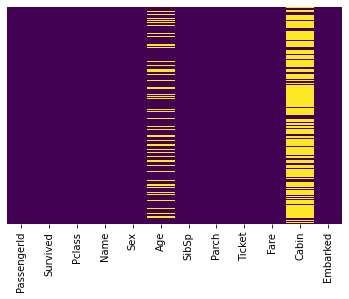

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [14]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

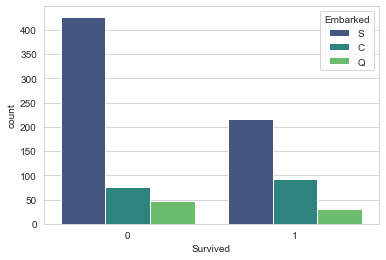

In [20]:
sns.countplot(x='Survived',data=train,palette='viridis',hue='Embarked')


<AxesSubplot:xlabel='Age'>

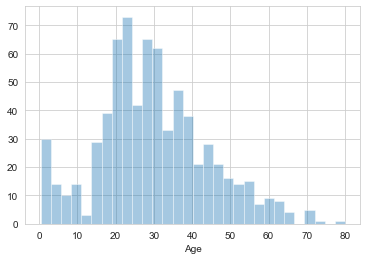

In [27]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [25]:
len(train['Age'].dropna())

714

<AxesSubplot:xlabel='Fare', ylabel='Count'>

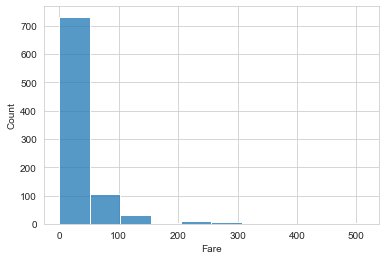

In [35]:
sns.histplot(x='Fare',data=train,palette='viridis',bins=10)

In [38]:
train['Age'].mean()

29.69911764705882

<AxesSubplot:xlabel='Age', ylabel='Count'>

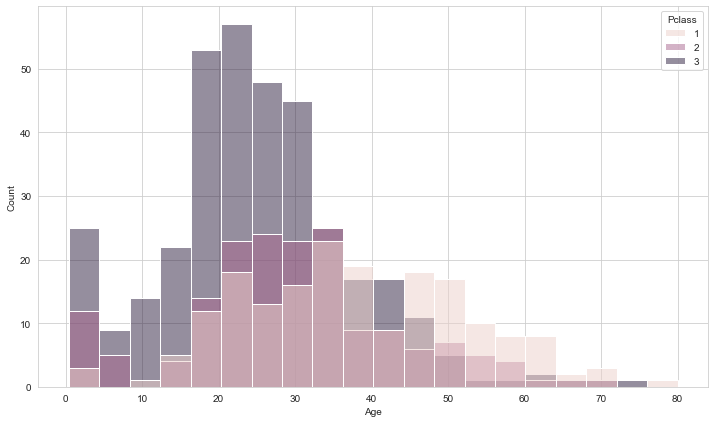

In [42]:
plt.figure(figsize=(12,7))
sns.histplot(data=train,x='Age',hue='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

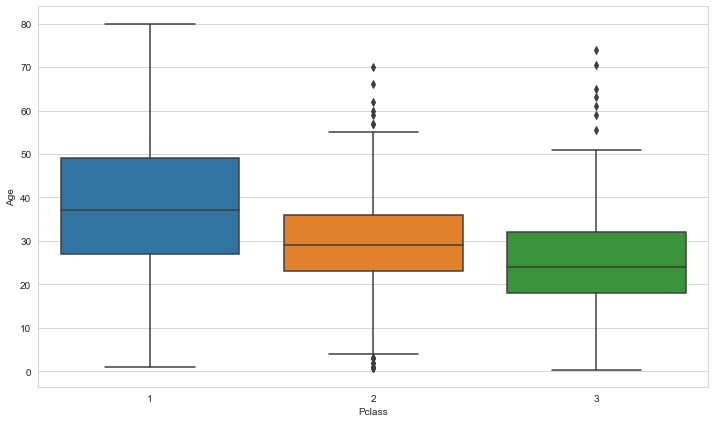

In [43]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [49]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [51]:
def func2(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [52]:
train['Age']=train[['Age','Pclass']].apply(func2,axis=1)

<AxesSubplot:>

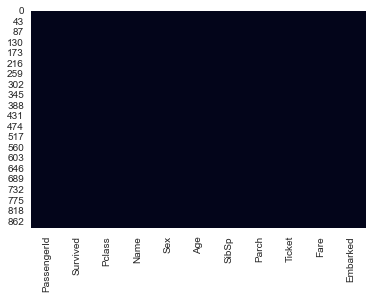

In [62]:
sns.heatmap(train.isnull(),cbar=False)

In [57]:
train.drop('Cabin',axis=1,inplace=True)

In [61]:
train.dropna(inplace=True)

In [64]:
# creating dummy variables

In [67]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [71]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [72]:
train=pd.concat([train,sex,embark],axis=1)

In [74]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [77]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [76]:
train.drop('PassengerId',axis=1,inplace=True)

In [78]:
#Model building

In [79]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
log=LogisticRegression()

In [84]:
log.fit(X_train,y_train)

C:\Users\affan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
preds=log.predict(X_test)

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
print(confusion_matrix(y_test,preds))

[[147  16]
 [ 30  74]]
